# House Prices: Advanced Classification Techniques

## Outline:

#### 1. Introduction 
#### 2. Data Wrangling
#### 3. Data Story
#### 4. Inferential Satistics 
#### 5. Macine Learning 

## 1. Introduction

The Us Adult income classification from Kaggle competitions is chosen to be Second Capstone Project. This project relates income to social factors such as Age, Education, race etc.

The Us Adult income dataset was extracted by Barry Becker from the 1994 US Census Database. The data set consists of anonymous information such as occupation, age, native country, race, capital gain, capital loss, education, work class and more. Each row is labelled as either having a salary greater than ">50K" or "<=50K". This Data set is split into two CSV files, named adult-training.txt and adult-test.txt.

The goal here is to train a binary classifier on the training dataset to predict the column income_bracket which has two possible values ">50K" and "<=50K" and evaluate the accuracy of the classifier with the test dataset. 

Note that the dataset is made up of categorical and continuous features. It also contains missing values 
The categorical columns are: workclass, education, maritalstatus, occupation, relationship, race, gender, nativecountry
The continuous columns are: age, educationnum, capitalgain, capitalloss, hoursper_week

The work would include data wrangling, exploratory data analysis and machine learning.
Creative feature engineering and advanced classification techniques like Decision Tree Model, Logistic Regression Model, Random Forest Classifier Model and SVC Model are needed to complete this project.


## 2. Data Wrangling


### 2.1 Data Set Variables

The data set is provided by Kaggle. The data is loaded in to Pandas data frame without difficulty. 

In order to understand our data, we should look at each variable and try to understand their meaning and relevance to this problem. The data set consists of anonymous information such as occupation, age, native country, race, capital gain, capital loss, education, work class and more. Each row is labelled as either having a salary greater than ">50K" or "<=50K". Note that the dataset is made up of categorical and continuous features. It also contains missing values. 

The categorical columns are: workclass, education, maritalstatus, occupation, relationship, race, gender, nativecountry.

The continuous columns are: age, educationnum, capitalgain, capitalloss, hoursper_week.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
#import warnings
#warnings.filterwarnings('ignore')
#%matplotlib inline

In [3]:
#loan training data
columns = ['Age','Workclass','fnlwgt','Education','Education Num','Marital Status',
           'Occupation','Relationship','Race','Gender','Capital Gain','Capital Loss',
           'Hours Per Week','Native Country','Income Bracket']
df_train = pd.read_csv('adult-training.csv', names=columns)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         32561 non-null object
fnlwgt            32561 non-null int64
Education         32561 non-null object
Education Num     32561 non-null int64
Marital Status    32561 non-null object
Occupation        32561 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Gender            32561 non-null object
Capital Gain      32561 non-null int64
Capital Loss      32561 non-null int64
Hours Per Week    32561 non-null int64
Native Country    32561 non-null object
Income Bracket    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df_train.head()

,Age,Workclass,fnlwgt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours Per Week,Native Country,Income Bracket
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
#check Variable
df_train.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education Num',
       'Marital Status', 'Occupation', 'Relationship', 'Race', 'Gender',
       'Capital Gain', 'Capital Loss', 'Hours Per Week', 'Native Country',
       'Income Bracket'],
      dtype='object')

### 2.2 Missing data

Missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. We need to check prevalent of missing data and if missing data is random or have a pattern.

In [7]:
df_train.replace(' ?', np.nan, inplace=True)

In [8]:
#missing data
total = df_train.isna().sum().sort_values(ascending=False)
percent = (df_train.isna().sum()/df_train.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
Occupation,1843,0.056601
Workclass,1836,0.056386
Native Country,583,0.017905
Income Bracket,0,0.000000
Hours Per Week,0,0.000000


If more than 15% of the data is missing, we should exclude the corresponding variable in our analysis. 

'Occupation', 'Workclass', 'Native Country' have small percentage of missing data. 

To handle missing data, we'll just delete the observation with missing data.

We will also exclude 'fnlwgt' feature here as it is not relevent.

In [9]:
df_train = df_train.dropna()
df_train.drop('fnlwgt', axis=1, inplace=True)
df_train.describe()

,Age,Education Num,Capital Gain,Capital Loss,Hours Per Week
count,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,10.121312,1092.007858,88.372489,40.931238
std,13.134665,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [10]:
df_train.isnull().sum().max()

0

## 3. Data Story


Income price descriptive statistics summary

In [11]:
df_train['Income Bracket'].describe()

count      30162
unique         2
top        <=50K
freq       22654
Name: Income Bracket, dtype: object

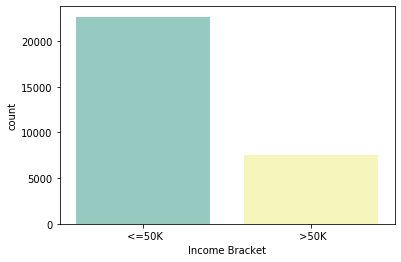

In [12]:
sns.countplot('Income Bracket', data=df_train, palette="Set3")


The plot above shows that 75% of people make less than 50K and 25% make more than 50K

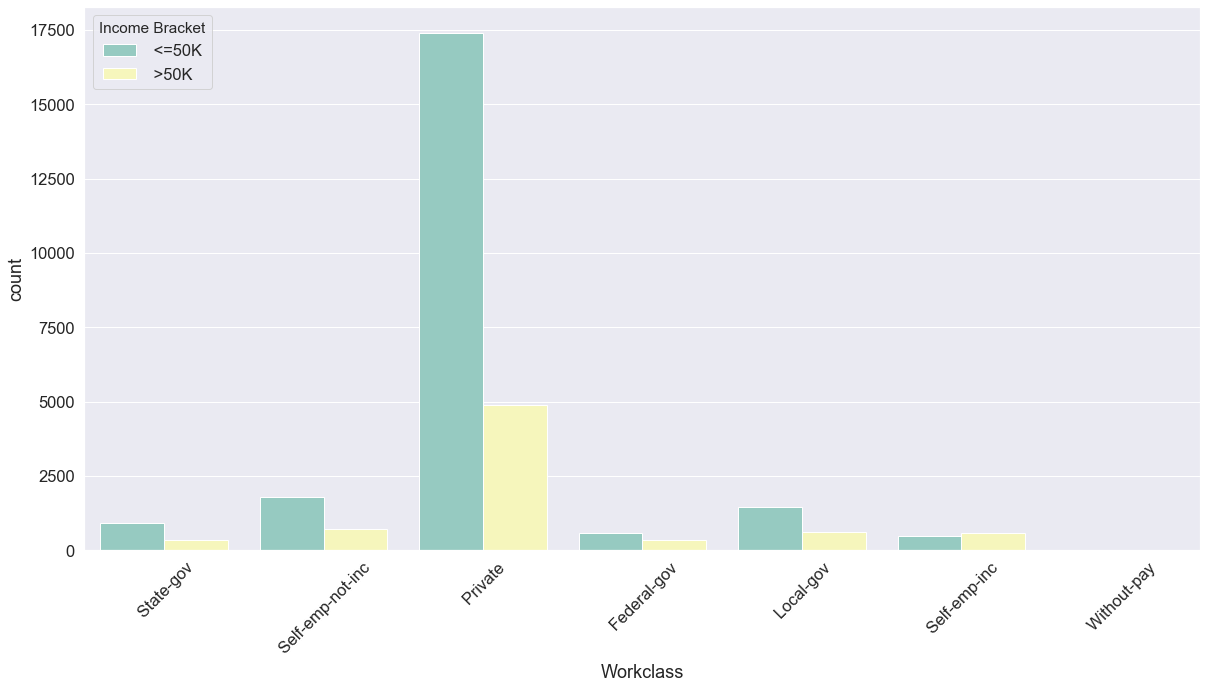

In [13]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5)
plt.xticks(rotation=45)
sns.countplot('Workclass', hue='Income Bracket', data=df_train, palette="Set3")

The figure above shows that most people are working in the private sector. Self employed inc workers have more fraction of people making over 50K than other sectors. While in other sectors, more fraction of people making less than 50K. 

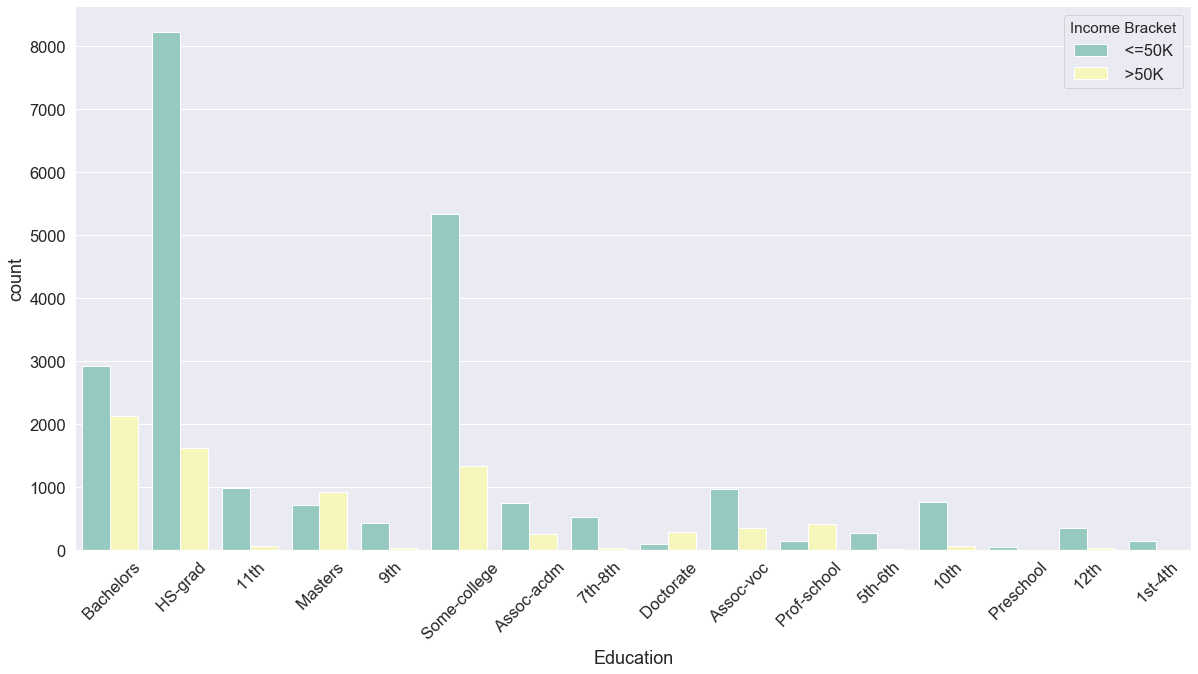

In [14]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5)
plt.xticks(rotation=45)
sns.countplot('Education', hue='Income Bracket', data=df_train, palette="Set3")

The figure above shows that most individuals from this dataset have an education of highschool or more. and higher the education, the more fractin of people making more than 50K

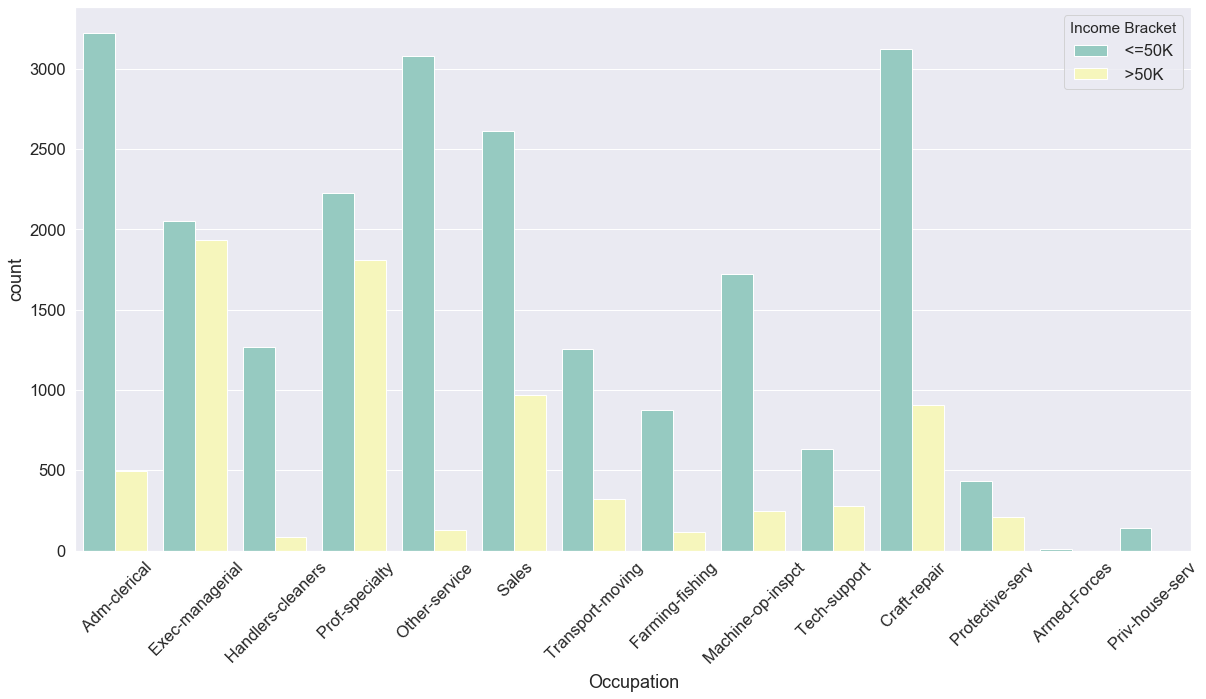

In [15]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5)
plt.xticks(rotation=45)
sns.countplot('Occupation', hue='Income Bracket', data=df_train, palette="Set3")

The figure above shows the histogram of the different occupations in the dataset for incomes <=50K and >50K. Exec-managerial and prof-specialty has higher fraction of people making >50K. 

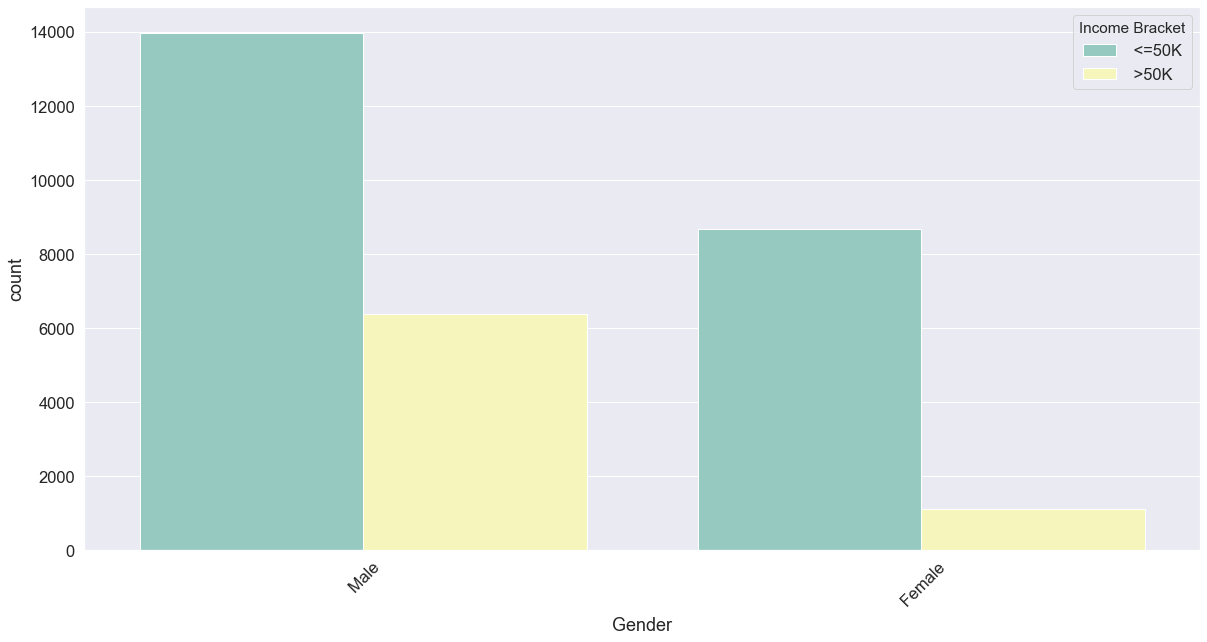

In [16]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5)
plt.xticks(rotation=45)
sns.countplot('Gender', hue='Income Bracket', data=df_train, palette="Set3")

The figure above shows that there are far less females in ratio making >50K in comparison to males.

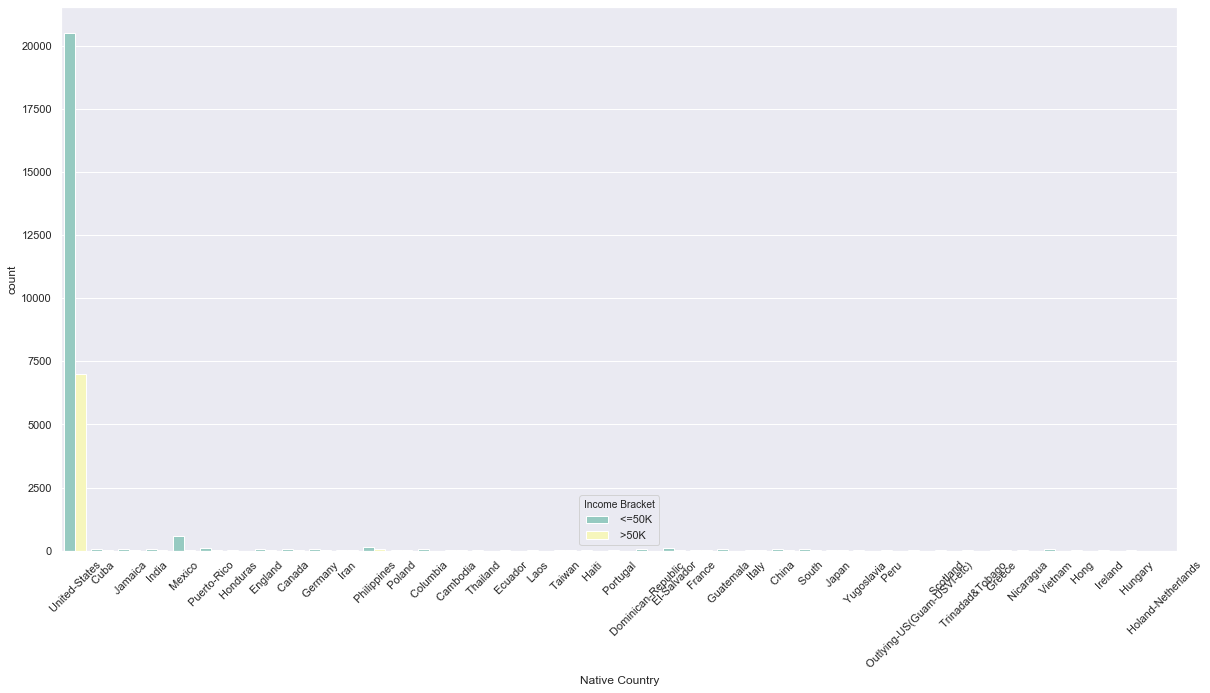

In [17]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.0)
plt.xticks(rotation=45)
sns.countplot('Native Country', hue='Income Bracket', data=df_train, palette="Set3")

The figure above shows that most individuals native country is United States and second highest is Mexico.

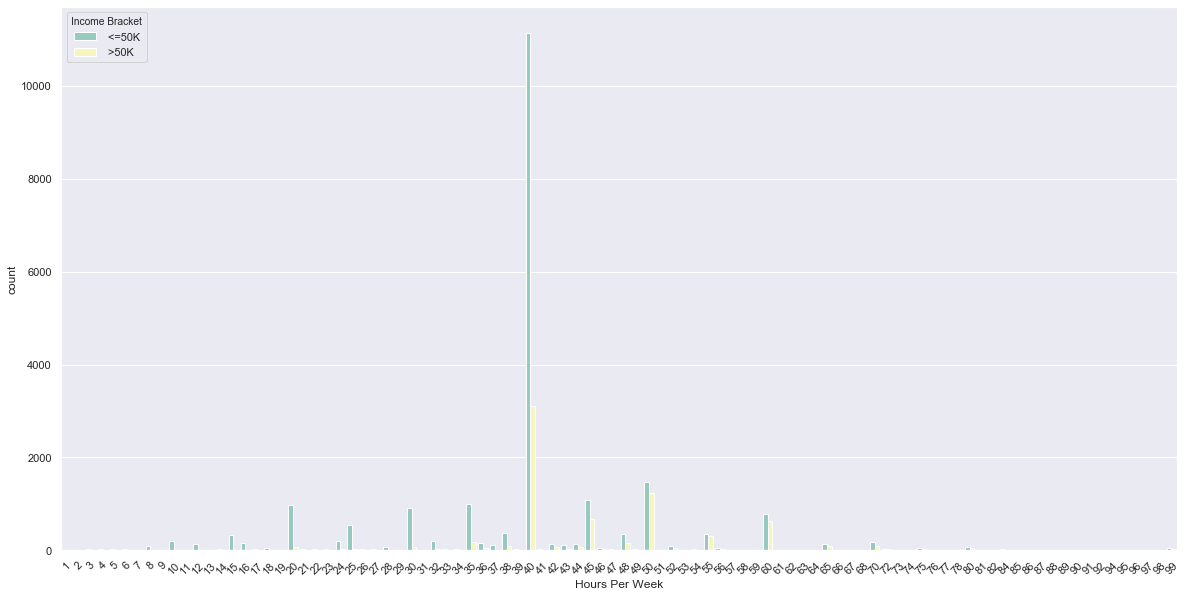

In [18]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.0)
plt.xticks(rotation=45)
sns.countplot('Hours Per Week', hue='Income Bracket', data=df_train, palette="Set3")


The figure above shows the histogram of the "Hours Per Week" in the dataset for incomes <=50K and >50K. Most individuals are working 40 hours per week. A large amount of individuals who make >50K seem to work 40 hours or more per week. 

The figure above shows the histogram of the different ages in the dataset. There is a wide age gap in this dataset, from 17 years old to 90 years old. 

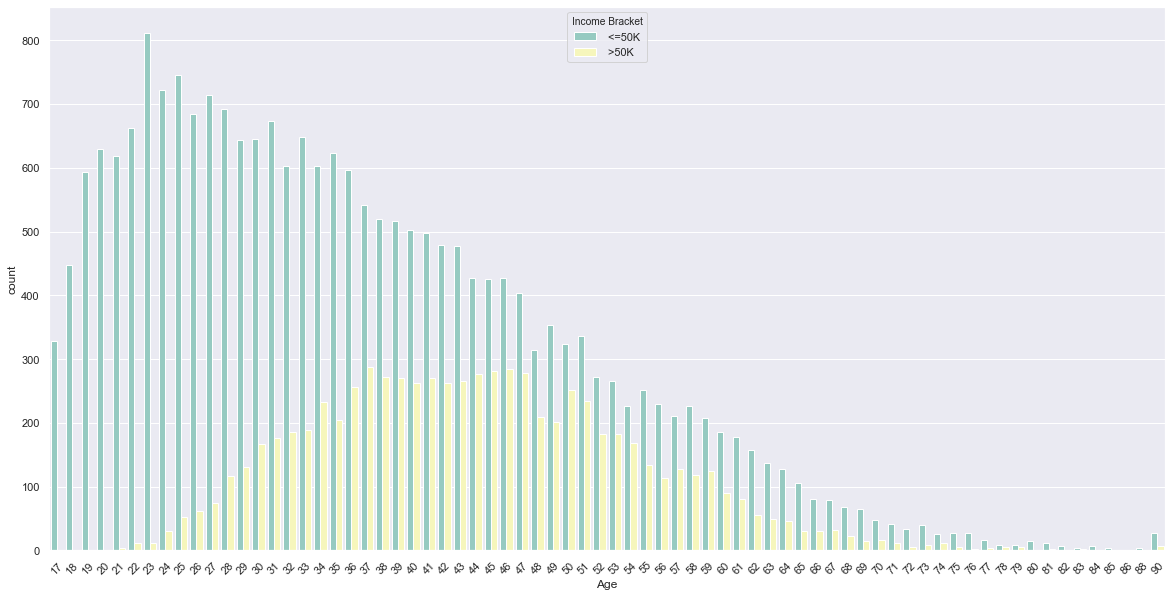

In [19]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.0)
plt.xticks(rotation=45)
sns.countplot('Age', hue='Income Bracket', data=df_train, palette="Set3")

The figure above shows the histogram of the different ages in the dataset. Most people making more than 50K are between age 28 and 60. The fraction people making more than 50K is increasing with age to about 50 and then stablized untill about 65.

In [20]:
df_train.replace([' <=50K',' >50K' ] , [0,1], inplace=True)
df_train.head(10)

,Age,Workclass,Education,Education Num,Marital Status,Occupation,Relationship,Race,Gender,Capital Gain,Capital Loss,Hours Per Week,Native Country,Income Bracket
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1


In [21]:
# correlation matrix  
corr_matrix = df_train.corr()
corr_matrix

,Age,Education Num,Capital Gain,Capital Loss,Hours Per Week,Income Bracket
Age,1.000000,0.043526,0.080154,0.060165,0.101599,0.241998
Education Num,0.043526,1.000000,0.124416,0.079646,0.152522,0.335286
Capital Gain,0.080154,0.124416,1.000000,-0.032229,0.080432,0.221196
Capital Loss,0.060165,0.079646,-0.032229,1.000000,0.052417,0.150053
Hours Per Week,0.101599,0.152522,0.080432,0.052417,1.000000,0.229480
Income Bracket,0.241998,0.335286,0.221196,0.150053,0.229480,1.000000


The table above and the figure below shows a correlation matrix of the numerical variables in the dataset. Education Num has the highest correlation while Capital Loss has the lowest correlation. 

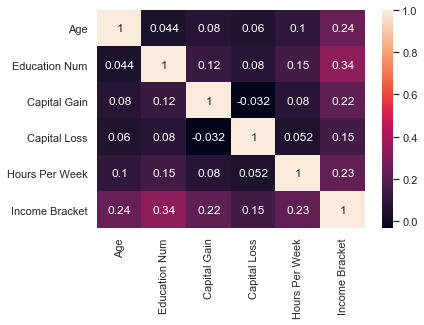

In [22]:
sns.heatmap(corr_matrix, annot=True)